In [338]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [339]:
data=pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [340]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Visualization

**Correlation**

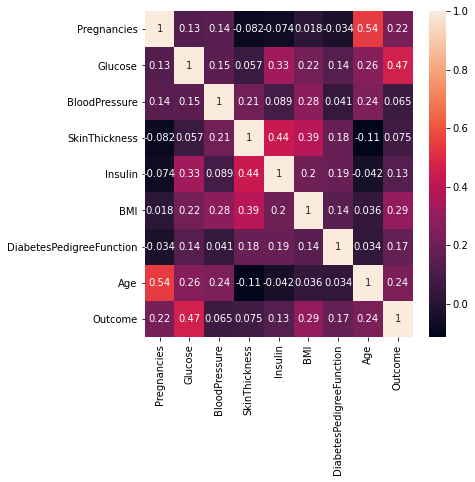

In [341]:
import seaborn as sns
data_corr=data.corr()
plt.figure(figsize=(6,6))
sns.heatmap(data_corr,annot=True)
plt.show()

**Distribution of Outcome**

<AxesSubplot:ylabel='Outcome'>

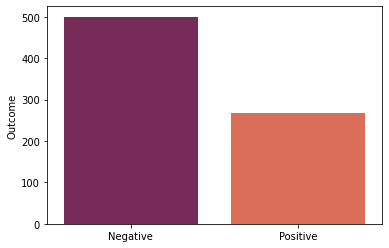

In [342]:
len(data[data.Outcome==1])
sns.barplot(x=['Negative','Positive'],y=data.Outcome.value_counts(),palette="rocket")

**Outcome - Pregnancies Distrubition**

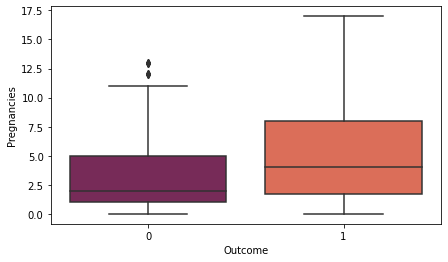

In [343]:
plt.figure(figsize=(7,4))
ax=sns.boxplot(x=data.Outcome, y=data.Pregnancies, data=data,palette="rocket")
plt.show()

**Outcome - Age Distribution**

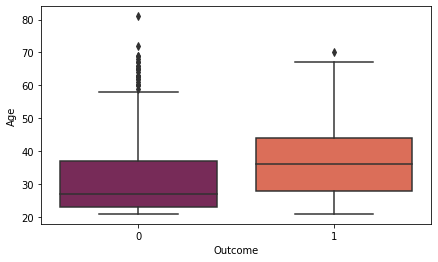

In [344]:
plt.figure(figsize=(7,4))
ax=sns.boxplot(x=data.Outcome, y=data.Age, data=data,palette="rocket")
plt.show()

**Outcome - BMI Distribution**

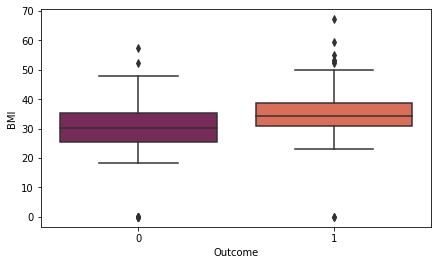

In [345]:
plt.figure(figsize=(7,4))
ax=sns.boxplot(x=data.Outcome, y=data.BMI, data=data,palette="rocket")
plt.show()

**Outcome - Glucose Distribution**

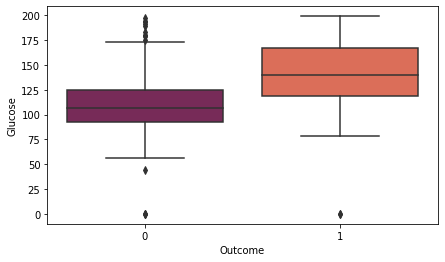

In [346]:
plt.figure(figsize=(7,4))
ax=sns.boxplot(x=data.Outcome, y=data.Glucose, data=data,palette="rocket")
plt.show()

# Data Preprocessing

**Dependent and Independent Variables**

In [347]:
x=data.iloc[:,0:8].values
y=data.iloc[:,8].values

**Train Test Split**

In [348]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

**Scaling**

In [349]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scl=ss.fit_transform(x_train)
x_test_scl=ss.fit_transform(x_test)

# Logistic Regression

In [350]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train_scl,y_train)
y_pred=log_reg.predict(x_test_scl)

**Metrics**


Accuracy Score: %74.46 
F1 Score: %61.94



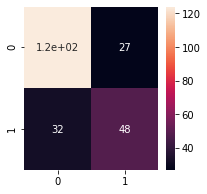

In [351]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
accuracy_lr= accuracy_score(y_test,y_pred)
f1_score_lr=f1_score(y_test,y_pred)
cf=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cf,annot=True)
plt.plot()
print("\nAccuracy Score: %{:.2f} \nF1 Score: %{:.2f}\n".format(accuracy_lr*100,f1_score_lr*100))

The accuracy score and f1 score results of the Logistic Regression model are quite low. I want to  create an ANN model with keras.

# Artifical Neural Network

In [352]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow import keras

classifier=Sequential()
classifier.add(Dense(units=32,activation='tanh',input_dim=8))

classifier.add(Dense(units=8,activation="tanh"))

classifier.add(Dense(units=2,activation="tanh"))




classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer ='adam',loss= 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train_scl,y_train,epochs=42)

Epoch 1/42
17/17 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.5296
Epoch 2/42
17/17 [==============================] - 0s 1ms/step - loss: 0.5922 - accuracy: 0.7412
Epoch 3/42
17/17 [==============================] - 0s 1ms/step - loss: 0.5326 - accuracy: 0.7640
Epoch 4/42
17/17 [==============================] - 0s 1ms/step - loss: 0.5001 - accuracy: 0.7877
Epoch 5/42
17/17 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7968
Epoch 6/42
17/17 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.8052
Epoch 7/42
17/17 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.7974
Epoch 8/42
17/17 [==============================] - 0s 1ms/step - loss: 0.4912 - accuracy: 0.7722
Epoch 9/42
17/17 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7804
Epoch 10/42
17/17 [==============================] - 0s 1ms/step - loss: 0.4599 - accuracy: 0.7857
Epoch 11/42
17/17 [

**Test Accuracy:**


Accuracy Score: %77.49 
F1 Score: %66.67



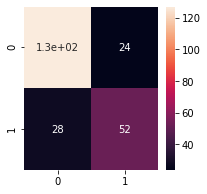

In [353]:
y_pred_ann=classifier.predict(x_test_scl)
y_pred_ann=(y_pred_ann>0.5)
acc_ann=accuracy_score(y_test,y_pred_ann)

f1_score_ann=f1_score(y_test,y_pred_ann)
plt.figure(figsize=(3,3))
crr_NN=confusion_matrix(y_test,y_pred_ann)
sns.heatmap(crr_NN,annot=True)
plt.plot()
print("\nAccuracy Score: %{:.2f} \nF1 Score: %{:.2f}\n".format(acc_ann*100,f1_score_ann*100))

Yes not perfect but better than logistic regression result in terms of f1 score.